<a href="https://colab.research.google.com/github/AjtheXplorer/Kelompok5B/blob/main/Tugas_kelompok_5_kelas_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas regresi data

import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

download file dari kaggle

In [ ]:
# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)


100%|██████████| 12.3k/12.3k [00:00<00:00, 18.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/the-boston-houseprice-data/versions/1


In [ ]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)

In [ ]:
df = pd.read_csv(filepath)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Buat axis

In [ ]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
# Membagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat model LinearRegresi

In [ ]:
model = LinearRegression()
print(model)

LinearRegression()


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Buat prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24.291119474973478
R-squared: 0.6687594935356326


masukkan data prediksi

In [ ]:
data_baru = pd.DataFrame({
    'CRIM': [0.00632],
    'ZN': [18.0],
    'INDUS': [2.31],
    'CHAS': [0.0],
    'NOX': [0.538],
    'RM': [6.575],
    'AGE': [65.2],
    'DIS': [4.0900],
    'RAD': [1.0],
    'TAX': [296.0],
    'PTRATIO': [15.3],
    'B': [396.90],
    'LSTAT': [4.98]
})

harga_prediksi = model.predict(data_baru)
print(f"Harga prediksi untuk data baru: {harga_prediksi}")

Harga prediksi untuk data baru: [29.95339638]


Visualisasikan data terhadap beberapa variabel

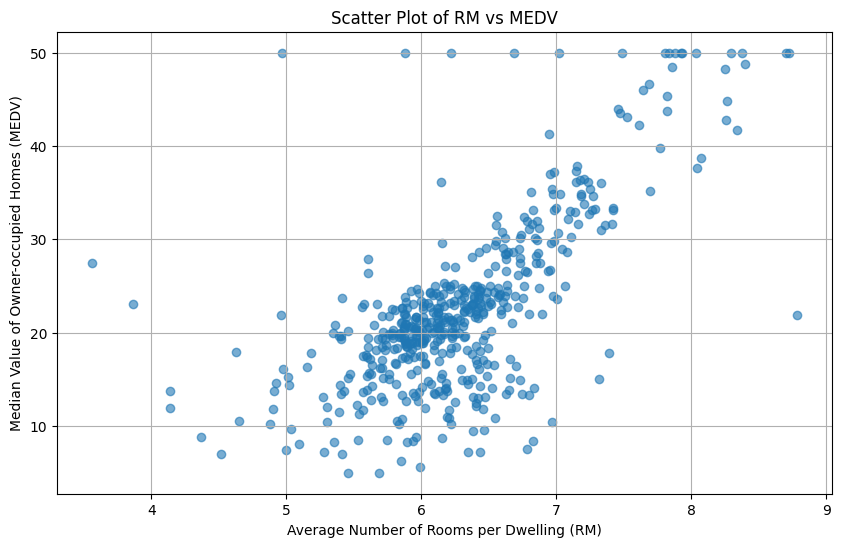

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], alpha=0.6)

# Contoh klasifikasi data dikarenakan nilai y_pred tidak sama dengan x, sehingga diganti dengan klasifikasi baru diatas

plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-occupied Homes (MEDV)')
plt.grid(True)
plt.show()


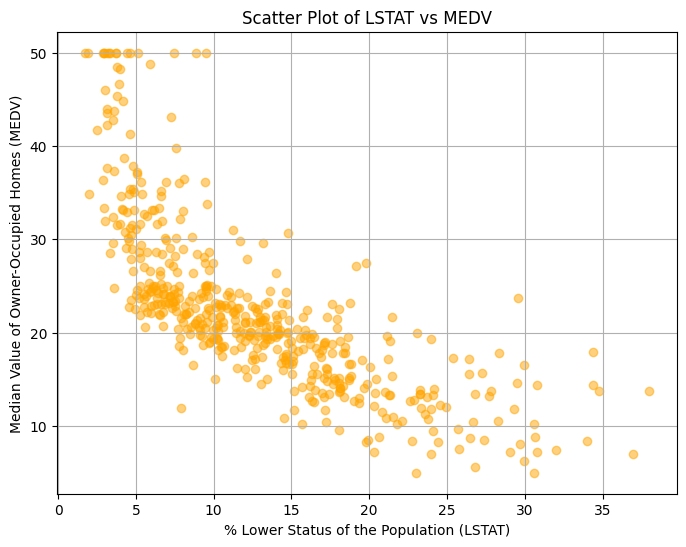

In [ ]:
# Scatter plot of 'LSTAT' vs 'MEDV'
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5, color='orange')
plt.xlabel('% Lower Status of the Population (LSTAT)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.grid(True)
plt.show()